# Project Bike Demand Forecasting 

In [272]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [273]:
df=pd.read_csv('C:/Users/andre/Documents/SPICED/unsupervised-lemon-encounter-notes/week_03/data/train.csv', sep=',', parse_dates=True, index_col=0)
df.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-10-09 23:00:00,4,0,0,1,20.50,24.240,88,7.0015,38,85,123
2012-04-08 13:00:00,2,0,0,1,23.78,27.275,23,11.0014,229,254,483
2011-08-04 15:00:00,3,0,1,1,32.80,37.880,55,16.9979,50,115,165
2012-12-13 20:00:00,4,0,1,1,12.30,16.665,45,0.0000,6,235,241
2011-04-09 21:00:00,2,0,0,2,14.76,17.425,93,8.9981,10,65,75
2011-01-04 06:00:00,1,0,1,1,4.92,7.575,74,7.0015,0,36,36
2011-12-18 01:00:00,4,0,0,1,8.20,11.365,69,7.0015,3,43,46
2012-04-04 02:00:00,2,0,1,1,18.86,22.725,51,0.0000,0,5,5
2012-02-09 20:00:00,1,0,1,1,13.12,17.425,36,0.0000,2,197,199


In [274]:
df.shape

(10886, 11)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [276]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Definition of the variables:

   * `season` from 1 to 4
   
     * 1 = Spring
     * 2 = Summer
     * 3 = Fall
     * 4 = Winter
   * `holiday`: weather day is holiday or not 
   * `weekday`: Day of the week
   * `workingday`: If day is neither weekend nor holiday is 1, otherwise is 0.
   * `weather`:
   
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
   * `temp`: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
   * `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
   * `humidity`: Normalized humidity. The values are divided to 100 (max)
   * `windspeed`: Normalized wind speed. The values are divided to 67 (max)
   * `casual`: count of casual users Count = 367 
   * `registered`: count of registered users Count = 886
   * `count`: count of total rental bikes including both casual and registered Count = 977

In [277]:
df.groupby('casual').count()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
casual,,,,,,,,,,
0,986,986,986,986,986,986,986,986,986,986
1,667,667,667,667,667,667,667,667,667,667
2,487,487,487,487,487,487,487,487,487,487
3,438,438,438,438,438,438,438,438,438,438
4,354,354,354,354,354,354,354,354,354,354
...,...,...,...,...,...,...,...,...,...,...
356,1,1,1,1,1,1,1,1,1,1
357,1,1,1,1,1,1,1,1,1,1
361,1,1,1,1,1,1,1,1,1,1


In [278]:
df.casual.value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
283      1
259      1
362      1
354      1
367      1
Name: casual, Length: 309, dtype: int64

## Split Training

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
x = df.iloc[:,:8]

In [281]:
y = df.iloc[:,8:]

In [282]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

#### I leave 20% of the data base as test and I split between predictors and the variables I want to predict

In [283]:
X_train 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-06-18 19:00:00,2,0,0,2,30.34,33.335,51,7.0015
2012-09-08 17:00:00,3,0,0,3,23.78,27.275,83,12.9980
2011-05-01 17:00:00,2,0,0,2,19.68,23.485,82,16.9979
2012-11-19 00:00:00,4,0,1,1,14.76,17.425,66,15.0013
2011-05-16 09:00:00,2,0,1,1,24.60,29.545,69,12.9980
...,...,...,...,...,...,...,...,...
2011-02-08 03:00:00,1,0,1,3,11.48,13.635,93,11.0014
2012-01-12 11:00:00,1,0,1,2,13.94,17.425,81,7.0015
2012-06-13 23:00:00,2,0,1,1,25.42,31.060,50,19.0012


In [284]:
y_train

,casual,registered,count
datetime,,,
2011-06-18 19:00:00,99,227,326
2012-09-08 17:00:00,52,119,171
2011-05-01 17:00:00,60,136,196
2012-11-19 00:00:00,5,22,27
2011-05-16 09:00:00,38,156,194
...,...,...,...
2011-02-08 03:00:00,0,1,1
2012-01-12 11:00:00,18,101,119
2012-06-13 23:00:00,25,128,153


## Let's check the NaN's?

In [285]:
import missingno as mn

In [286]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

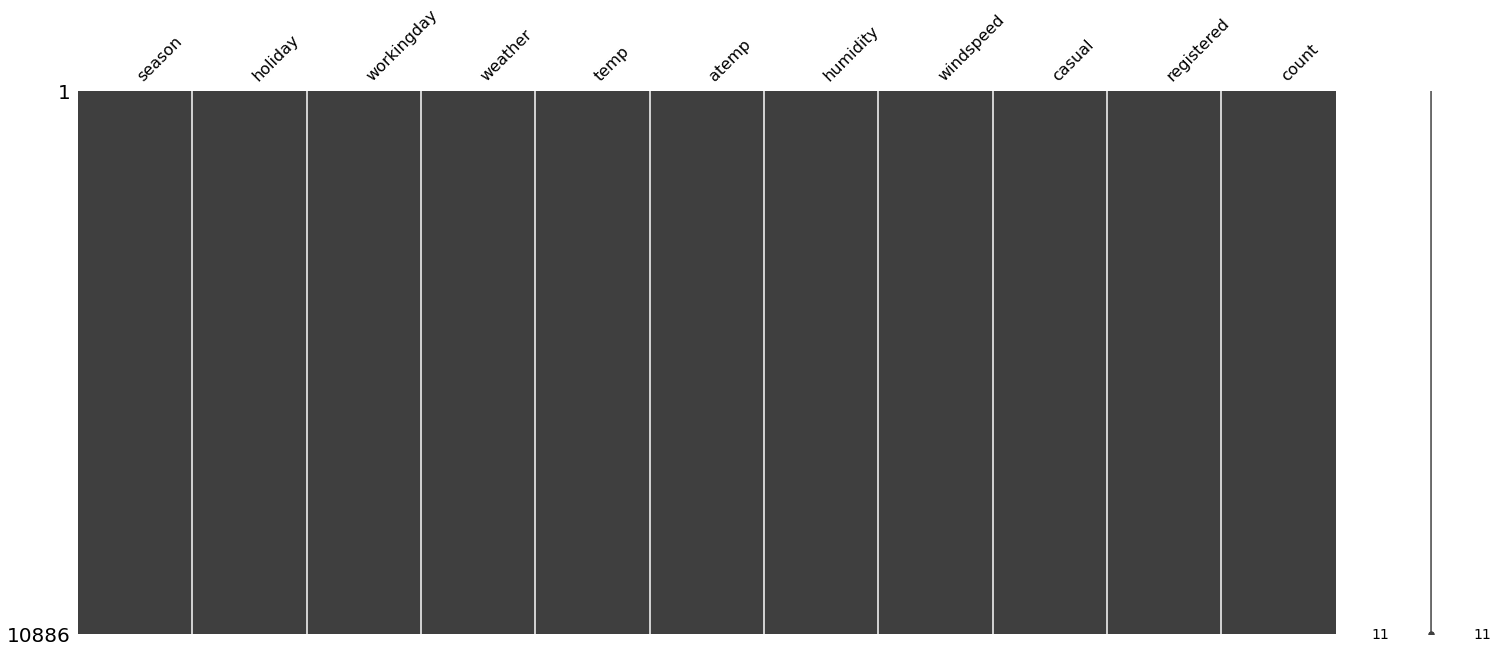

In [287]:
mn.matrix(df);

#### Great the there is no "holes" in the information

## Is there any Correlation between the labels?

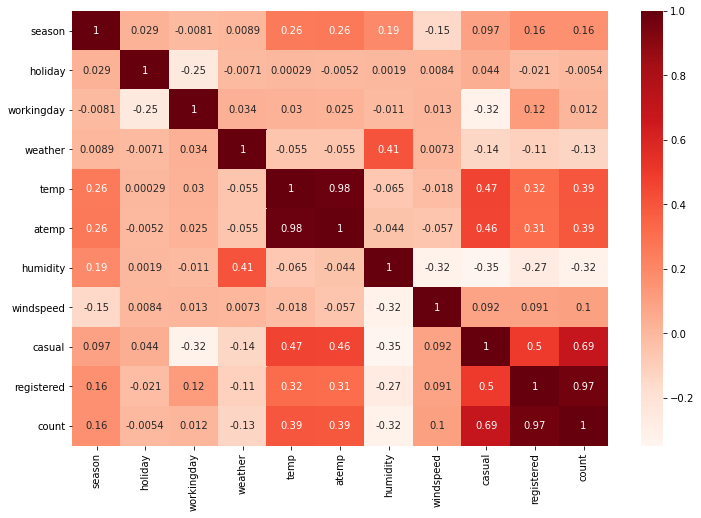

In [288]:
ax =plt.subplots(figsize=(12,8))
pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='Reds',
            annot=True);

* There is some interesting positive correlation between `count`, `temperature` and `humidity`.
* Negative correlation with `humidity`, `windspeed`. 
* `holiday` and Season seem relatively independent of the demand.
* `workingday` has an interesting correlation with `casual` and `registered`.

## In conclusion I'm going to use the following variables to model the total `count`: 
* `temp`
* `humidity`
* `workingday`

#### Given that atemp and temp are highly correlated between each other. I'll drop atemp because it's slightly less correlated and has different definitions in different countries.

In [289]:
df.drop('atemp', axis=1, inplace=True)

# Data Wrangling

In [290]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

In [291]:
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,0,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,1,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,2,1,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,3,1,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,4,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,19,19,12,2012
2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,20,19,12,2012
2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,21,19,12,2012


#### Setting the `season` and `weather` to be easier to read

In [292]:
codes_season = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
df['season'] = df['season'].map(codes_season)

In [293]:
codes_weather = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weather'] = df['weather'].map(codes_weather)

In [294]:
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0000,3,13,16,0,1,1,2011
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0000,8,32,40,1,1,1,2011
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0000,5,27,32,2,1,1,2011
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0000,3,10,13,3,1,1,2011
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0000,0,1,1,4,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,Winter,0,1,Clear,15.58,50,26.0027,7,329,336,19,19,12,2012
2012-12-19 20:00:00,Winter,0,1,Clear,14.76,57,15.0013,10,231,241,20,19,12,2012
2012-12-19 21:00:00,Winter,0,1,Clear,13.94,61,15.0013,4,164,168,21,19,12,2012


#### Changing `casual`, `registered` and `count` to binary. 

In [295]:
casual_bin = df[df['casual']==0]

In [296]:
casual_bin

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
datetime,,,,,,,,,,,,,,
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0000,0,1,1,4,1,1,2011
2011-01-01 05:00:00,Spring,0,0,Mist,9.84,75,6.0032,0,1,1,5,1,1,2011
2011-01-02 06:00:00,Spring,0,0,Light Snow,17.22,77,19.9995,0,2,2,6,2,1,2011
2011-01-02 07:00:00,Spring,0,0,Mist,16.40,76,12.9980,0,1,1,7,2,1,2011
2011-01-02 08:00:00,Spring,0,0,Light Snow,16.40,71,15.0013,0,8,8,8,2,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18 00:00:00,Winter,0,1,Mist,18.04,94,8.9981,0,18,18,0,18,12,2012
2012-12-18 01:00:00,Winter,0,1,Mist,18.04,94,8.9981,0,15,15,1,18,12,2012
2012-12-18 03:00:00,Winter,0,1,Clear,17.22,88,12.9980,0,5,5,3,18,12,2012


In [297]:
len(casual_bin)/len(df)

0.0905750505236083

In [298]:
registered_bin = df[df['registered']==0]
registered_bin.shape

(15, 14)

In [299]:
len(registered_bin)/len(df)

0.001377916590115745

In [300]:
neue_df=df[ (df['registered']!=0) & (df['casual']!=0)]
neue_df.shape


(9885, 14)

In [301]:
len(neue_df)/len(df)

0.908047032886276

#### Almost all the `registered` are in the `count` column and less than the 10% of the `casual` column are = 0 so I assume that the predictive power of this columns  is not going to be determinant and I'll try to predict count.

# Exploratory Data Analysis

In [302]:
from matplotlib import pyplot as plt

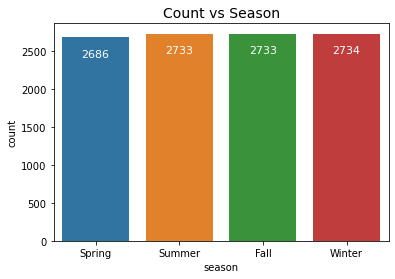

In [303]:
ax = sns.countplot(x='season',data=df)
ax.set_title('Count vs Season', fontsize=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show();

#### There is no important impact of the `season`  in the total count

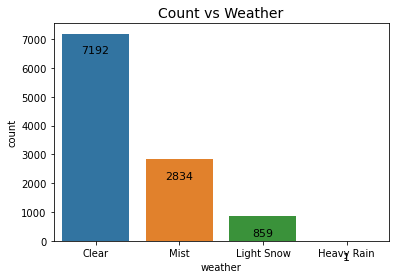

In [304]:
ax = sns.countplot(x='weather',data=df)
ax.set_title('Count vs Weather', fontsize=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)
plt.show();

#### 

In [305]:
df_by_weather = df.groupby('weather').count()
print(round(((df_by_weather.loc['Clear']['season']+df_by_weather.loc['Mist']['season'])/df_by_weather.iloc[:]['season'].sum())*100,2),'%')

92.1 %


#### The 92,1% of the data is just Clear and Mist weather

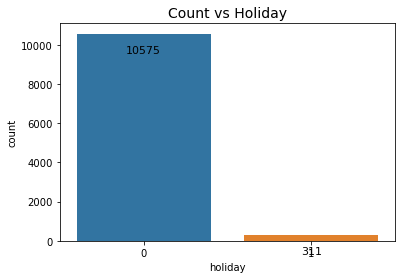

In [306]:
ax = sns.countplot(x='holiday',data=df)
ax.set_title('Count vs Holiday', fontsize=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)
plt.show();

In [307]:
df_by_holiday = df.groupby('holiday').count()

print(round((df_by_holiday.iloc[0]['season']/df_by_holiday.iloc[:]['season'].sum())*100,3),'%')

97.143 %


#### Holiday is almost totally "non-holiday" so I assume that the predictive power is going to be low. I'll see that after with the matrix of correlations and evaluate if i drop this column

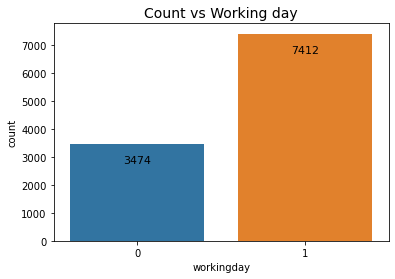

In [308]:
ax = sns.countplot(x='workingday',data=df)
ax.set_title('Count vs Working day', fontsize=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)
plt.show();

In [309]:
 df.groupby('workingday').count()


,season,holiday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
workingday,,,,,,,,,,,,,
0,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474
1,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412


In [310]:
df_by_workingday = df.groupby('workingday').count()

print(round((df_by_workingday.iloc[1]['season']/df_by_workingday.iloc[0]['season'].sum())*100,3),'%')

213.356 %


#### The app is used twice more during the week rather than the weekends. This effect has to take into account that the working days are 5 between 2 of the typical week. So I taking that proportion into account.

In [311]:
print(round(((df_by_workingday.iloc[1]['season']/df_by_workingday.iloc[0]['season'].sum())/2.5)*100,3),'%')

85.343 %


#### It looks like there is more use during the weekends than during the week. 

#### I'm gonna try to see the registered vs casual vs count

In [312]:
df.groupby

<bound method DataFrame.groupby of                      season  holiday  workingday weather   temp  humidity  \
datetime                                                                    
2011-01-01 00:00:00  Spring        0           0   Clear   9.84        81   
2011-01-01 01:00:00  Spring        0           0   Clear   9.02        80   
2011-01-01 02:00:00  Spring        0           0   Clear   9.02        80   
2011-01-01 03:00:00  Spring        0           0   Clear   9.84        75   
2011-01-01 04:00:00  Spring        0           0   Clear   9.84        75   
...                     ...      ...         ...     ...    ...       ...   
2012-12-19 19:00:00  Winter        0           1   Clear  15.58        50   
2012-12-19 20:00:00  Winter        0           1   Clear  14.76        57   
2012-12-19 21:00:00  Winter        0           1   Clear  13.94        61   
2012-12-19 22:00:00  Winter        0           1   Clear  13.94        61   
2012-12-19 23:00:00  Winter        0     

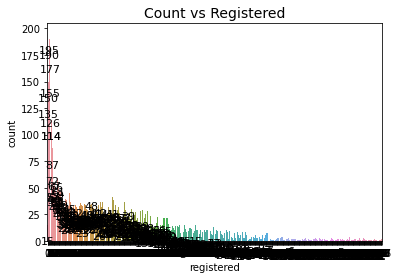

In [313]:
ax = sns.countplot(x='registered',data=df)
ax.set_title('Count vs Registered', fontsize=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)
plt.show();

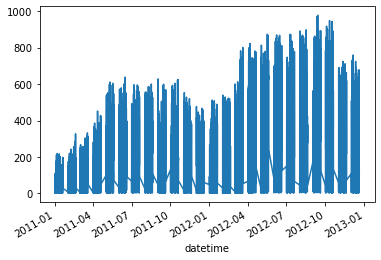

In [314]:
df['count'].plot();

#### There is an increase in the registered people across the 2 years

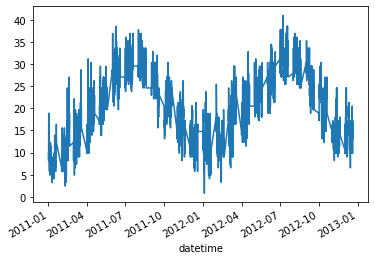

In [315]:
df['temp'].plot();

#### There is a VERY clear stationality of the temperature.

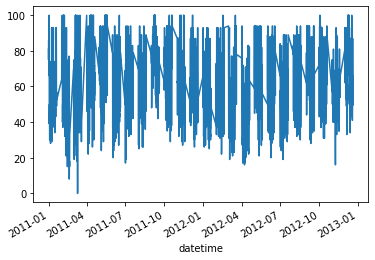

In [316]:
df['humidity'].plot();

## Let's see how behaves the demand along 1 day

<ipython-input-317-57349c7b7f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour'] = X_train.index.hour
<ipython-input-317-57349c7b7f33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['hour'] = y_train.index.hour


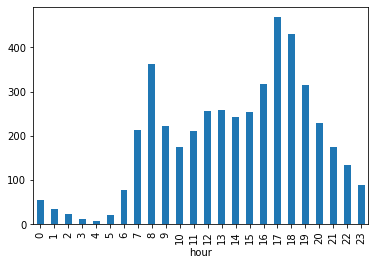

In [317]:
df['hour']= df.index.hour
X_train['hour'] = X_train.index.hour
y_train['hour'] = y_train.index.hour
df_hour= df['hour']
df.groupby('hour')['count'].mean().plot(kind='bar');

#### There is a very clear 2 "rush hours" usually when the people go to work and when they come back.

## One Hot Encoding

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [319]:
ohe = OneHotEncoder(sparse=False)

In [320]:
hour_ohe = ohe.fit_transform(X_train[['hour']])

In [321]:
m = LinearRegression()

In [322]:
m.fit(hour_ohe, y_train['count'])
y_train['ypred_ohe'] = m.predict(hour_ohe)

<ipython-input-322-ab2f77008a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_ohe'] = m.predict(hour_ohe)


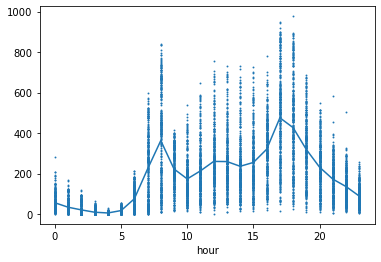

In [323]:
y_train.groupby('hour')['ypred_ohe'].mean().plot();
plt.scatter(X_train['hour'], y_train['count'], s=0.8);

In [325]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)

In [326]:
hour_poly = poly.fit_transform(X_train[['hour']])

In [327]:
m.fit(hour_poly, y_train['count'])

LinearRegression()

In [328]:
y_train['ypred_poly'] = m.predict(hour_poly)

<ipython-input-328-164dcbd32ed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_poly'] = m.predict(hour_poly)


In [329]:
y_train

,casual,registered,count,hour,ypred_ohe,ypred_poly
datetime,,,,,,
2011-06-18 19:00:00,99,227,326,19,318.96875,348.826149
2012-09-08 17:00:00,52,119,171,17,475.56250,394.104694
2011-05-01 17:00:00,60,136,196,17,475.56250,394.104694
2012-11-19 00:00:00,5,22,27,0,56.03125,40.192872
2011-05-16 09:00:00,38,156,194,9,222.84375,253.711883
...,...,...,...,...,...,...
2011-02-08 03:00:00,0,1,1,3,9.40625,-30.687959
2012-01-12 11:00:00,18,101,119,11,213.68750,220.756698
2012-06-13 23:00:00,25,128,153,23,88.93750,100.352710


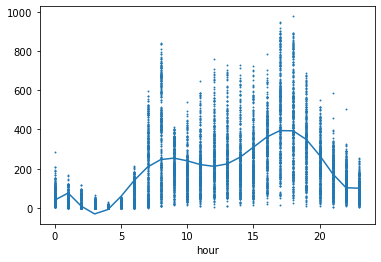

In [330]:
y_train.groupby('hour')['ypred_poly'].mean().plot();
plt.scatter(X_train['hour'], y_train['count'], s=0.8);

In [331]:
m.score(hour_poly, y_train['count'])

0.45983704399023795

### A little better than before, but still needs a lot of work, let's incorporate the other variables

## 3rd Iteration Linear Regression

In [332]:
df.head(5)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,0.0,3,13,16,0,1,1,2011
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,0.0,8,32,40,1,1,1,2011
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,0.0,5,27,32,2,1,1,2011
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,0.0,3,10,13,3,1,1,2011
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,0.0,0,1,1,4,1,1,2011


In [333]:
x = X_train[['hour','workingday','temp','humidity','windspeed']]

In [334]:
poly_2 = PolynomialFeatures(degree=8)

In [335]:
poly_2.fit(x)

PolynomialFeatures(degree=8)

In [336]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [337]:
#  numerical_columns = ['hour','temp','humidity','windspeed']
#  categorical_columns = ['workingday']

In [338]:
#column_transformer = ColumnTransformer([('scaler', StandardScaler(), numerical_columns)], remainder = 'passthrough' )

In [339]:
#column_transformer.fit(x)
# x_fe = column_transformer.transform(x)

In [340]:
Xpoly = poly_2.transform(x).astype(int)


In [341]:
m.fit(Xpoly, y_train['count'])

LinearRegression()

In [342]:
Xpoly.shape

(8708, 1287)

In [343]:
y_train['ypred_Xpoly'] = m.predict(Xpoly)

<ipython-input-343-811f4c958336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_Xpoly'] = m.predict(Xpoly)


In [344]:
m.score(Xpoly, y_train['count'])

0.759845110355171

## Far better score than before, let's plot it...

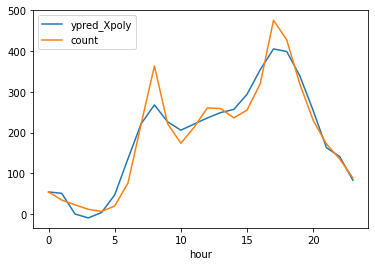

In [345]:
y_train.groupby('hour')['ypred_Xpoly'].mean().plot();
y_train.groupby('hour')['count'].mean().plot();
plt.legend();

## Scoretest

In [346]:
y_test['hour']=y_test.index.hour

<ipython-input-346-9d6e0f6bb5cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['hour']=y_test.index.hour


In [347]:
y_test

,casual,registered,count,hour
datetime,,,,
2012-07-10 13:00:00,77,203,280,13
2012-10-07 13:00:00,80,240,320,13
2012-01-11 14:00:00,3,70,73,14
2012-09-19 21:00:00,25,324,349,21
2012-04-02 04:00:00,2,2,4,4
...,...,...,...,...
2012-05-10 06:00:00,9,130,139,6
2011-07-10 21:00:00,65,162,227,21
2011-02-07 04:00:00,1,1,2,4


In [348]:
X_test['hour']=X_test.index.hour

In [349]:
xtest = X_test[['hour','workingday','temp','humidity','windspeed']]

In [350]:
poly_3 = PolynomialFeatures(degree=8)

In [351]:
poly_3.fit(xtest)

PolynomialFeatures(degree=8)

In [352]:
Xpoly_test = poly_3.transform(xtest).astype(int)


In [353]:
m.fit(Xpoly_test, y_test['count'])

LinearRegression()

In [354]:
y_test['ypred_Xpoly_test'] = m.predict(Xpoly_test)

<ipython-input-354-3ff66a0148d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['ypred_Xpoly_test'] = m.predict(Xpoly_test)


In [355]:
m.score(Xpoly_test, y_test['count'])

0.8187928336450961

In [356]:
m.coef_, m.intercept_

(array([-3.22933394e+01, -3.06002083e+02, -2.79262094e+04, ...,
         2.16857643e-09, -2.86661361e-10, -5.82213033e-09]),
 2559.182421917571)

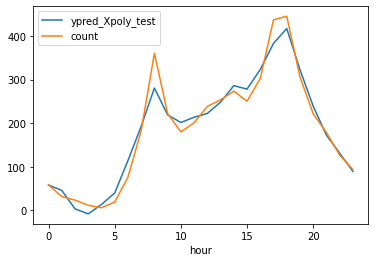

In [357]:
y_test.groupby('hour')['ypred_Xpoly_test'].mean().plot();
y_test.groupby('hour')['count'].mean().plot();

plt.legend();

## It seems that needs some adjusment on the rush hours, but it predicts particularlly good at 2pm. Also the difference between Train and test score is around 6%. So even though it's acceptable, there is still room for improvement...

# Regularization

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42285597.645634376, tolerance: 28807.065471933856
  model = cd_fast.enet_coordinate_descent(


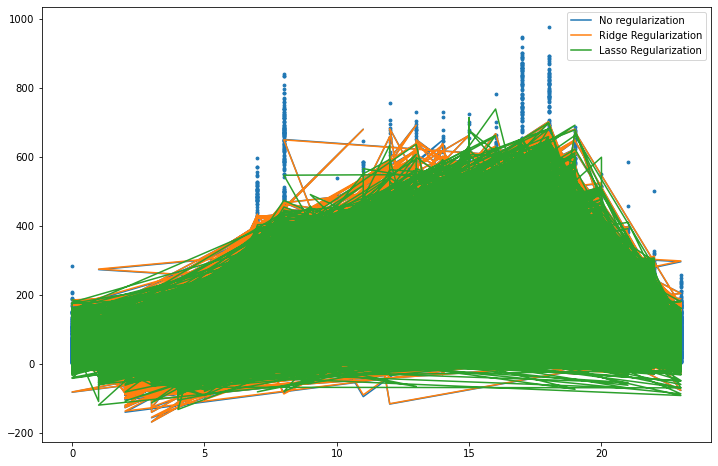

In [358]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
m = LinearRegression() #no regularization 
m_ridge = Ridge(alpha=0.5) #ridge regularization
m_lasso = Lasso(alpha=0.5) #lasso regularization

m.fit(Xpoly, y_train['count'])       
m_ridge.fit(Xpoly, y_train['count'])  
m_lasso.fit(Xpoly, y_train['count'])  

ypred_reg = m.predict(Xpoly)
ypred_ridge = m_ridge.predict(Xpoly)
ypred_lasso = m_lasso.predict(Xpoly)

plt.figure(figsize=(12, 8))
plt.scatter(x['hour'], y_train['count'], s=8)
plt.plot(x['hour'], ypred_reg)
plt.plot(x['hour'], ypred_ridge)
plt.plot(x['hour'], ypred_lasso)
plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])

# Let's try to forecast Saturday 2pm

In [359]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
datetime,,,,,,,,,
2012-07-10 13:00:00,3,0,1,1,33.62,36.365,38,12.9980,13
2012-10-07 13:00:00,4,0,0,2,18.04,21.970,72,6.0032,13
2012-01-11 14:00:00,1,0,1,3,13.12,16.665,81,7.0015,14
2012-09-19 21:00:00,3,0,1,1,20.50,24.240,59,11.0014,21
2012-04-02 04:00:00,2,0,1,1,16.40,20.455,76,32.9975,4
...,...,...,...,...,...,...,...,...,...
2012-05-10 06:00:00,2,0,1,1,18.04,21.970,72,15.0013,6
2011-07-10 21:00:00,3,0,0,1,30.34,34.090,62,16.9979,21
2011-02-07 04:00:00,1,0,1,1,8.20,12.880,86,0.0000,4


## According to https://weather.com/weather/hourbyhour/l/57cc6eb02c4a08a4b126b05ffd2f41db82b40e54868394e6087105b9f5d4d83d#detailIndex4
## Saturday 17th,2pm,  Berlin


In [360]:
temp_sat = 26
humidity_sat = 68
windspeed_sat= 18

In [361]:
df['temp'].mean()

20.230859819952173

In [362]:
df['humidity'].mean()

61.88645967297446

In [363]:
df['windspeed'].mean()

12.799395406945093

In [364]:
x_dummy = {'hour':14,'workingday':0,'temp':temp_sat,'humidity':humidity_sat,'windspeed':windspeed_sat } # It's is going to be created to be able to add to the data set.

In [365]:
x_dummy_df = pd.DataFrame(x_dummy, index=[len(df)])

In [366]:
x_dummy_df

,hour,workingday,temp,humidity,windspeed
10886,14,0,26,68,18


In [367]:
poly_4 = PolynomialFeatures(degree=8)

In [368]:
poly_4.fit(x_dummy_df)

PolynomialFeatures(degree=8)

In [369]:
Xpoly_dummy = poly_4.transform(x_dummy_df).astype(int)

In [370]:
ypred_sat= m.predict (Xpoly_dummy)

In [371]:
ypred_sat

array([442.28941027])

# Under this conditions... 
* temp_sat = 26 
* humidity_sat = 68 
* windspeed_sat= 18 
# The forecast says that it is expected **442** bycicles for that hour

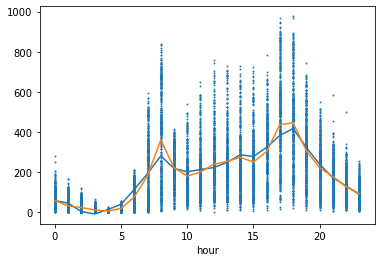

In [372]:
y_test.groupby('hour')['ypred_Xpoly_test'].mean().plot();
y_test.groupby('hour')['count'].mean().plot();

plt.scatter(df['hour'], df['count'], s=0.8);

# RMSLE Train and Test 

In [373]:
from sklearn.metrics import mean_squared_log_error


In [374]:
def rmsle(p,a):
    return np.sqrt(mean_squared_log_error(p,a))

In [375]:
ypred_rmsle_train= y_train['ypred_Xpoly']
ypred_rmsle_train[ypred_rmsle_train < 0] = 0.0

<ipython-input-375-977b7e7e779b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ypred_rmsle_train[ypred_rmsle_train < 0] = 0.0
C:\Users\andre\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [376]:
rmsle(y_train['count'],ypred_rmsle_train)

0.957661198484117

In [377]:
ypred_rmsle_test= y_test['ypred_Xpoly_test']
ypred_rmsle_test[ypred_rmsle_test < 0] = 0.0

<ipython-input-377-3dcd572f9f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ypred_rmsle_test[ypred_rmsle_test < 0] = 0.0
C:\Users\andre\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [378]:
rmsle(y_test['count'],ypred_rmsle_test)

0.9447630828476352

## Kaggle Submission

In [379]:
df_kag=pd.read_csv('C:/Users/andre/Documents/SPICED/unsupervised-lemon-encounter-notes/week_03/data/test.csv', sep=',', parse_dates=True, index_col=0)
df_kag

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


In [380]:
x_kag = df_kag.iloc[:,:8]

In [381]:
y_kag = df_kag.iloc[:,8:]

In [382]:
x_kag['hour'] = x_kag.index.hour

In [383]:
x_kag_poly = x_kag[['hour','workingday','temp','humidity','windspeed']]

In [384]:
poly_kag = PolynomialFeatures(degree=8)

In [385]:
poly_kag.fit(x_kag_poly)

PolynomialFeatures(degree=8)

In [386]:
Xpoly_kag = poly_kag.transform(x_kag_poly).astype(int)

In [387]:
y_pred_kag= m.predict(Xpoly_kag)

In [388]:
kag_df = {"datetime": y_kag.index,
                 "count": y_pred_kag}
kag_df = pd.DataFrame(kag_df)
kag_df['count'][kag_df['count']<0] = 0.0
kag_df

<ipython-input-388-ead50b5a1f94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kag_df['count'][kag_df['count']<0] = 0.0


,datetime,count
0,2011-01-20 00:00:00,24.722980
1,2011-01-20 01:00:00,37.754993
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,9.890965
4,2011-01-20 04:00:00,32.835301
...,...,...
6488,2012-12-31 19:00:00,191.906379
6489,2012-12-31 20:00:00,135.009894
6490,2012-12-31 21:00:00,75.159797
6491,2012-12-31 22:00:00,97.435294


In [389]:
kag_df.to_csv("kag_df_bikes.csv",index=False)

## Kaggle Score 1.105

# Let's try to improve a little bit the model with Random Forests

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [391]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=3)

In [392]:
rf.fit(x,y_train['count'])

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=500)

In [393]:
ypred_rf = rf.predict(x)

In [394]:
rmsle(ypred_rf,y_train['count'])

0.3337961324277038

In [395]:
accuracy_score(ypred_rf,y_train['count'])

0.7133670188332568

## With RF the RMSLE drops significally from  0,945 --> 0,326

In [396]:
rf.feature_importances_

array([0.25991001, 0.05541959, 0.24094655, 0.23736802, 0.20635583])

## Maybe I can improve it using Grid Search

In [397]:
#from sklearn.model_selection import GridSearchCV

In [398]:
# rf_opti = RandomForestClassifier()

In [399]:
# hyperparams = {
   # 'max_depth': [2, 5, 7, 10], 
    #'n_estimators': [50, 100,150,200],
    #'min_samples_leaf': [1,2,3,4]
#}

In [400]:
# g = GridSearchCV(rf_opti, hyperparams, cv=10, scoring='r2')

In [401]:
# g.fit(x, y_train['count'])

In [402]:
# g.best_params_    

In [403]:
# pd.DataFrame(g.cv_results_)

In [404]:
# rf_best = g.best_estimator_

In [405]:
# rf_best.predict(Xtest)

In [406]:
# rf_best.score(Xtest, ytest)